# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
mice_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [45]:
# Checking the number of mice.
mice_study_df["Mouse ID"].nunique()

249

In [46]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_values = mice_study_df[["Timepoint", "Mouse ID"]].duplicated()

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mice_study_df.drop_duplicates(keep=False)
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_vol = clean_df.groupby(clean_df["Drug Regimen"])
mean_vol = mean_vol["Tumor Volume (mm3)"].mean()
mean_vol

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.414660
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [50]:
#median
med_vol = clean_df.groupby(clean_df["Drug Regimen"])
med_vol = med_vol["Tumor Volume (mm3)"].median()
med_vol

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.965298
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [51]:
#variance
var_vol = clean_df.groupby(clean_df["Drug Regimen"])
var_vol = var_vol["Tumor Volume (mm3)"].var()
var_vol

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.199890
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [52]:
#volume
std_vol = clean_df.groupby(clean_df["Drug Regimen"])
std_vol = std_vol["Tumor Volume (mm3)"].std()
std_vol

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.496144
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [53]:
sem_vol = clean_df.groupby(clean_df["Drug Regimen"])
sem_vol = sem_vol["Tumor Volume (mm3)"].sem()
sem_vol

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.515178
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [54]:
summ_stats_dict = {"Mean Tumor Volume": mean_vol,
                   "Median Tumor Volume": med_vol,
                   "Tumor Volume Variance": var_vol,
                   "Tumor Volume Std. Dev.": std_vol,
                   "Tumor Volume Std. Err.": sem_vol}


In [55]:
summ_stats = pd.DataFrame(summ_stats_dict)
summ_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

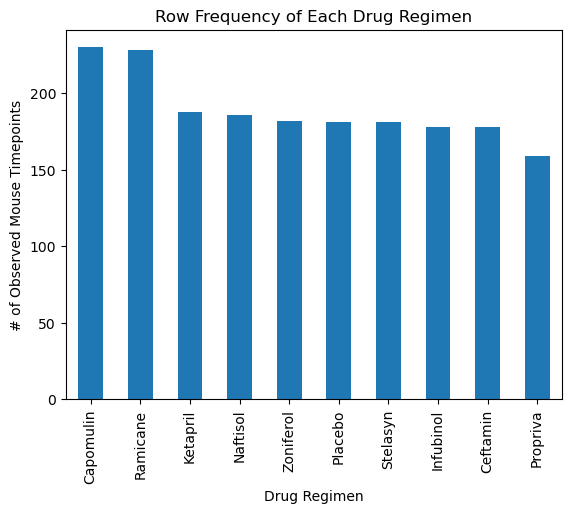

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df["Drug Regimen"].value_counts().plot(kind="bar", ylabel="# of Observed Mouse Timepoints",
                                             title="Row Frequency of Each Drug Regimen")
plt.show()

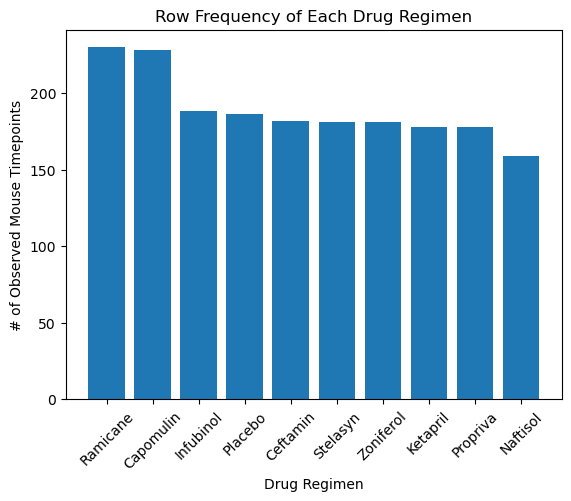

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_df["Drug Regimen"].value_counts()
plt.bar(clean_df["Drug Regimen"].unique(), drug_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Row Frequency of Each Drug Regimen")
plt.xticks(rotation=45)
plt.show()

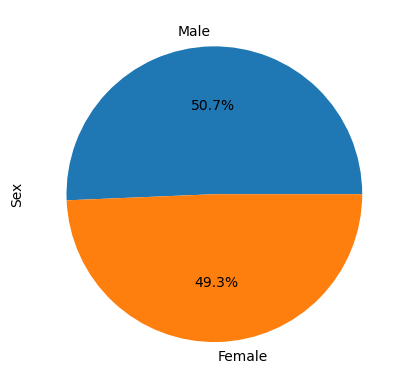

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", ylabel="Sex")
plt.show()

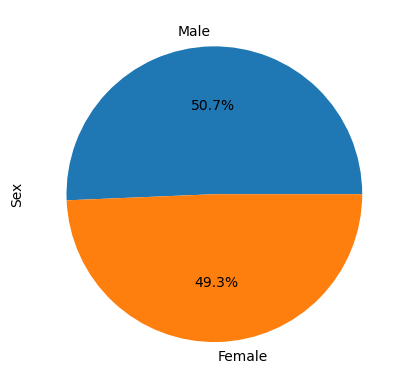

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = clean_df["Sex"].value_counts()
labels = clean_df["Sex"].unique()
autopct = "%1.1f%%"
plt.pie(sex_count, labels=labels, autopct=autopct)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean_df.groupby(clean_df["Mouse ID"])
max_timepoint = mouse_group["Timepoint"].max()
max_timepoint = pd.DataFrame({"Mouse ID": max_timepoint.index, "Max Timepoint": max_timepoint.values})
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
result_df = pd.merge(max_timepoint, clean_df, left_on=['Mouse ID', 'Max Timepoint'], right_on=['Mouse ID', 'Timepoint'], how='inner')
result_df.set_index("Mouse ID")

,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,,
a203,45,Infubinol,Female,20,23,45,67.973419,2
a251,45,Infubinol,Female,21,25,45,65.525743,1
a262,45,Placebo,Female,17,29,45,70.717621,4
a275,45,Ceftamin,Female,20,28,45,62.999356,3
a366,30,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
z435,10,Propriva,Female,12,26,10,48.710661,0
z578,45,Ramicane,Male,11,16,45,30.638696,0
z581,45,Infubinol,Female,24,25,45,62.754451,3


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_per_treatment = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = result_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    drug_df = result_df[result_df["Drug Regimen"] == drug]
    tumor_volume = drug_df["Tumor Volume (mm3)"]
    tumor_vol_per_treatment.append(tumor_volume)
    
    # add subset 
    # Determine outliers using upper and lower bounds
outliers = result_df.loc[(result_df["Tumor Volume (mm3)"] < lower_bound) | (result_df["Tumor Volume (mm3)"] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [Mouse ID, Max Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


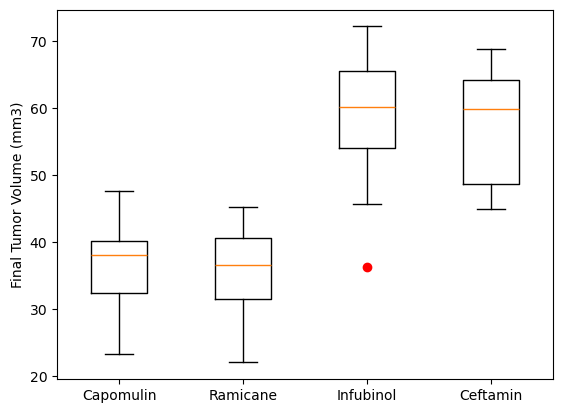

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_per_treatment, 0, "ro", labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_df.loc[clean_df["Mouse ID"] == "l509"]
mouse_l509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


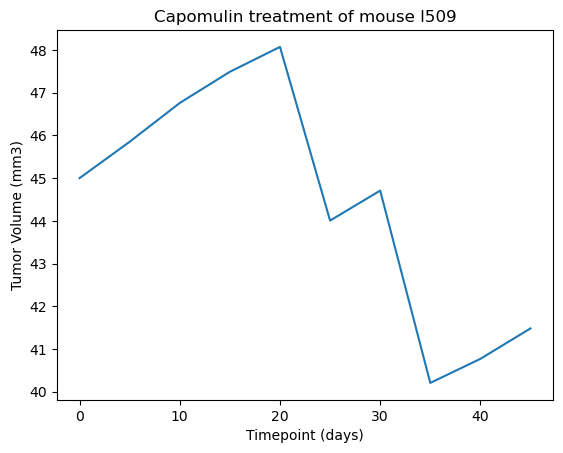

In [65]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

In [66]:
capomulin = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
mouse_group = capomulin.groupby(capomulin["Mouse ID"])
weight_vol_mean = mouse_group["Tumor Volume (mm3)"].mean()
weight_vol_mean = pd.DataFrame(weight_vol_mean)
weights_and_means = pd.merge(weight_vol_mean, capomulin[["Mouse ID", "Weight (g)"]], on="Mouse ID", how="left")
weights_and_means = weights_and_means.drop_duplicates()
weights_and_means

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
10,b742,40.083699,21
20,f966,36.505973,17
25,g288,41.990097,19
35,g316,44.613344,22
45,i557,44.805810,24
55,i738,39.141053,20
65,j119,44.465236,23
75,j246,43.216925,21
83,l509,44.434474,21


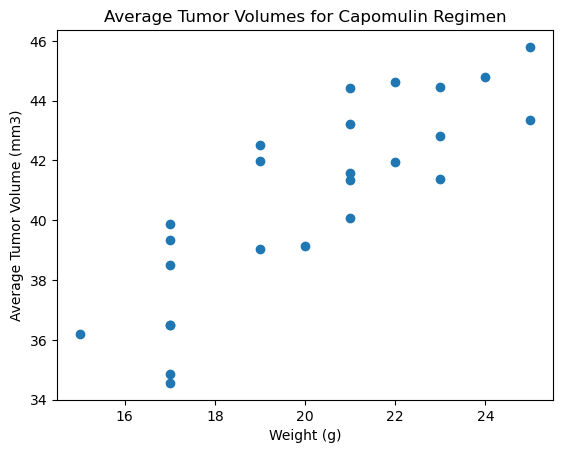

In [67]:
x_values = weights_and_means["Weight (g)"]
y_values = weights_and_means["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volumes for Capomulin Regimen")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


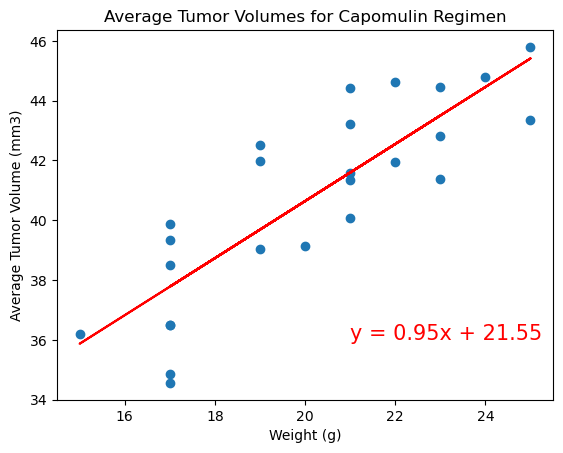

In [68]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = weights_and_means["Weight (g)"]
y_values = weights_and_means["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weights_and_means["Weight (g)"], weights_and_means["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volumes for Capomulin Regimen")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,36),fontsize=15,color="red")
plt.show()